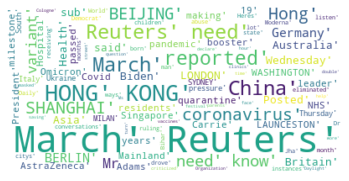

In [5]:
import spacy 
from newsapi import NewsApiClient
import en_core_web_lg
import pickle
import pandas as pd

nlp_eng = en_core_web_lg.load()
newsapi = NewsApiClient (api_key='2630205186cb412aa04ad905a3a8a43d')

articles = []
for i in range(1,6):
  temp = newsapi.get_everything(q='coronavirus', language='en', from_param='2022-02-27', to='2022-03-27', sort_by='relevancy', page=i)
  articles += temp['articles']

filename = 'articlesCOVID.pckl'
pickle.dump(articles, open(filename, 'wb'))
filename = 'articlesCOVID.pckl'
loaded_model = pickle.load(open(filename, 'rb'))
filepath = 'articlesCOVID.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

dados = []
for i, article in enumerate(articles):
  title = article['title']
  description = article['description']
  content = article['content']
  date = article['publishedAt']
  dados.append({'title':title, 'date':date, 'desc':description, 'content':content})
df = pd.DataFrame(dados)
df = df.dropna()
df.head()

def get_keywords_eng(contain):
  result = []
  pos_tag = ['NOUN','VERB','PROPN']
  punctuation = ['PUNCT']

  doc = nlp_eng(contain)
  for token in doc:
    if (token.text in nlp_eng.Defaults.stop_words or token.text in punctuation):
      continue
    if (token.pos_ in pos_tag):
      result.append(token.text)
  return result

  from collections import Counter

results = []
for content in df.content.values:
    results.append([x[0] for x in Counter(get_keywords_eng(content)).most_common(5)])
df['keywords'] = results

filename = 'articlesCOVID.pckl'
pickle.dump(df, open(filename, 'wb'))

from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = str(results)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()